**Visualize MoE Weights**

In [1]:
cases = [
    {'drug': 'f36295127251c623326ac34c85a5bbd0', 'prot': '899418d99797aa41d4bc8cc50361b11e'},
    {'drug': '7728dc39a5e0941de7371fb65f054011', 'prot': 'ea9b80ac17130f0ebc1681a55d9cf179'},
    {'drug': '7651fb11cc03867dcfa322e4a01da270', 'prot': '9881e7f1fbeb971605a72097fd1e8f74'}
]

/tmp/ipykernel_1365396/2435176825.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # 为颜色条留出空间


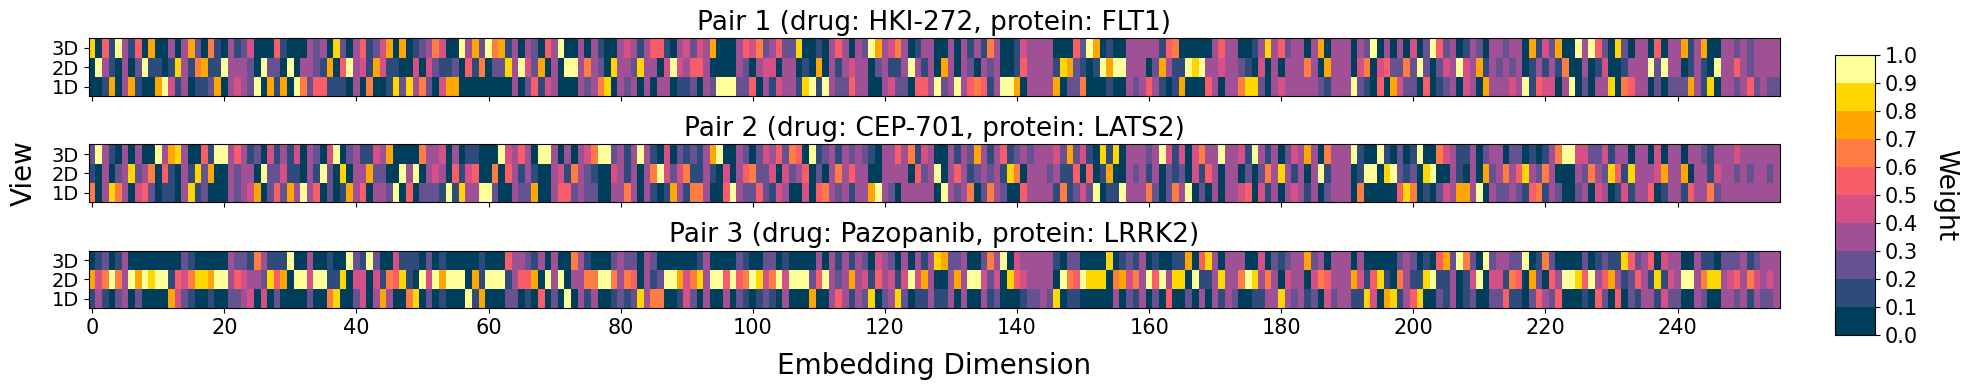

In [6]:
import pickle
import torch
import os

weight_dir = '/data/qingyuyang/dta_ours/output/davis/warm_fold0/moe_fullemb_1d2d3d_MANnew_0.0001/itp'

tensors = []
for info in cases:
    weight = torch.load(f"{weight_dir}/{info['drug']}_{info['prot']}/weight.pt", weights_only=True)
    tensors.append(weight)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建一个包含3个tensor的列表
tensor_labels = ["Pair 1 (drug: HKI-272, protein: FLT1)",
                 "Pair 2 (drug: CEP-701, protein: LATS2)",
                 "Pair 3 (drug: Pazopanib, protein: LRRK2)"]  # 每个tensor的标题

# 创建离散颜色映射（非渐变）
colors = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', 
          '#f95d6a', '#ff7c43', '#ffa600', '#ffd700', '#ffff99']
# n_bins = len(colors)
cmap = ListedColormap(colors)

# 创建图形和子图（3行1列）
fig, axes = plt.subplots(3, 1, figsize=(20, 4), sharex=True)
# 创建一个共享的颜色条轴
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [左, 下, 宽, 高]

# 为每个tensor绘制可视化
for i, (ax, tensor, label) in enumerate(zip(axes, tensors, tensor_labels)):
    # 绘制网格
    im = ax.pcolormesh(tensor.T,
                       cmap=cmap,
                    #    edgecolors='white',
                       linewidths=0,
                       shading='flat')
    
    # 设置标题和标签
    ax.set_title(label, fontsize=19)#, fontweight='bold'
    if i == 2:  # 只为最后一个子图设置x轴标签
        ax.set_xlabel('Embedding Dimension', fontsize=20, labelpad=10)
    if i == 1:
        ax.set_ylabel('View', fontsize=20, labelpad=10)
    
    # 设置y轴刻度
    ax.set_yticks(np.arange(3) + 0.5)
    ax.set_yticklabels([f'{j+1}D' for j in range(3)], fontsize=14)

# 设置x轴刻度（因为sharex=True，只需设置最后一个子图）
axes[-1].set_xticks(np.arange(0, 257, 20) + 0.5)
axes[-1].set_xticklabels(np.arange(0, 257, 20), fontsize=15)

# 添加共享的颜色条（调整为0-1范围）
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Weight', fontsize=19, labelpad=10, rotation=270, va='bottom')
cbar.set_ticks(np.linspace(0, 1, 11))  #n_bins 刻度范围改为0-1
cbar.set_ticklabels([f'{x:.1f}' for x in np.linspace(0, 1, 11)], fontsize=15)  #n_bins 显示一位小数

# 调整布局
plt.tight_layout(rect=[0, 0, 0.9, 1])  # 为颜色条留出空间

# 保存图片
plt.savefig('weights.png', dpi=200, bbox_inches='tight')
plt.show()